<a href="https://colab.research.google.com/github/saeedgolzar/AML_Course/blob/main/Assignments/ML_HW3/AML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Machine Learning | Homework 3

### Saeed Golzar

### Spring 2022   
   
##### [AML-HW3](https://github.com/saeedgolzar/AML_Course/blob/main/Assignments/ML_HW3/PML_HW3.pdf)
---

#Support Vector Machines

##Load Dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
#Load Dataset
path = "https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/1/parkinsons.data"
parkinsons = pd.read_csv(path)

#Define X, y and split
X = parkinsons.drop(['status','name'], axis=1)
y = parkinsons.status
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25)

#Define Result table
SVM_Result = pd.DataFrame(columns=['Kernel', 'r', 'd', 'γ', 'Accuracy', 'F1-Measure'])

##SVM model

###Linear Kernel

In [3]:
from sklearn.svm import SVC
from sklearn import metrics

linsvc = SVC(kernel = 'linear')
linsvc.fit(X_train, y_train)

y_pred = linsvc.predict(X_test)

acc_score = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

SVM_Result.drop(SVM_Result.index[SVM_Result['Kernel'] == 'Linear'], inplace=True)
SVM_Result.loc[len(SVM_Result.index)] = ['Linear', '-', '-', '-', acc_score, f1_score]
print('SVM with linear kernel result:')
SVM_Result.loc[SVM_Result['Kernel'] == 'Linear']


SVM with linear kernel result:


,Kernel,r,d,γ,Accuracy,F1-Measure
0,Linear,-,-,-,0.836735,0.894737


###Polynomial Kernel

In [4]:
from sklearn.svm import SVC
from sklearn import metrics

SVM_Result.drop(SVM_Result.index[SVM_Result['Kernel'] == 'Poly'], inplace=True)

#SVM model with Poly kernel
for d in [2, 3, 4, 5]:
  for r in [0.001, 0.1, 100, 1000]:

    polysvc = SVC(kernel = 'poly',  coef0=r, degree=d)
    polysvc.fit(X_train, y_train)

    y_pred = polysvc.predict(X_test)

    acc_score = metrics.accuracy_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)

    SVM_Result.loc[len(SVM_Result.index)] = ['Poly', r, d, '-', acc_score, f1_score]

print('SVM with poly kernel result:')
SVM_Result.loc[SVM_Result['Kernel'] == 'Poly']

SVM with poly kernel result:


,Kernel,r,d,γ,Accuracy,F1-Measure
1,Poly,0.001,2,-,0.857143,0.915663
2,Poly,0.1,2,-,0.857143,0.915663
3,Poly,100,2,-,0.877551,0.923077
4,Poly,1000,2,-,0.857143,0.909091
5,Poly,0.001,3,-,0.857143,0.913580
6,Poly,0.1,3,-,0.857143,0.913580
7,Poly,100,3,-,0.795918,0.864865
8,Poly,1000,3,-,0.775510,0.849315
9,Poly,0.001,4,-,0.877551,0.926829
10,Poly,0.1,4,-,0.857143,0.913580


####Hyper parameter tuning

In [5]:
from sklearn.model_selection import GridSearchCV

polysvc = SVC(kernel = 'poly')
parameters = {'degree':[2, 3, 4, 5], 'coef0': [0.001, 0.1, 100, 1000]}
gsearch = GridSearchCV(polysvc, parameters)
gsearch.fit(X_train, y_train)
clf = gsearch.best_estimator_
print('Best model is', clf)

Best model is SVC(coef0=100, degree=4, kernel='poly')


###Sigmoid Kernel

In [6]:
from sklearn.svm import SVC
from sklearn import metrics

SVM_Result.drop(SVM_Result.index[SVM_Result['Kernel'] == 'Sigmoid'], inplace=True)
for r in [1e-2, 1e-1, 1e0, 1e1]:

  sigsvc = SVC(kernel = 'sigmoid', coef0=r)
  sigsvc.fit(X_train, y_train)

  y_pred = sigsvc.predict(X_test)

  acc_score = metrics.accuracy_score(y_test, y_pred)
  f1_score = metrics.f1_score(y_test, y_pred)

  SVM_Result.loc[len(SVM_Result.index)] = ['Sigmoid', r, '-', '-', acc_score, f1_score]

print('SVM with sigmoid kernel result:')
SVM_Result.loc[SVM_Result['Kernel'] == 'Sigmoid']

SVM with sigmoid kernel result:


,Kernel,r,d,γ,Accuracy,F1-Measure
17,Sigmoid,0.01,-,-,0.795918,0.886364
18,Sigmoid,0.1,-,-,0.795918,0.886364
19,Sigmoid,1.0,-,-,0.795918,0.886364
20,Sigmoid,10.0,-,-,0.795918,0.886364


####Hyper parameter tuning

In [7]:
from sklearn.model_selection import GridSearchCV

sigsvc = SVC(kernel = 'sigmoid')
parameters = {'coef0':[0.001, 0.1, 10, 100, 1000]}
gsearch = GridSearchCV(sigsvc, parameters)
gsearch.fit(X_train, y_train)
clf = gsearch.best_estimator_
print('Best model is', clf)

Best model is SVC(coef0=0.001, kernel='sigmoid')


###RBF Kernel

In [8]:
from sklearn.svm import SVC
from sklearn import metrics

SVM_Result.drop(SVM_Result.index[SVM_Result['Kernel'] == 'RBF'], inplace=True)
for gama in [1e-3, 1e-2, 1e-1, 1e0, 10]:

  rbfsvc = SVC(kernel = 'rbf', gamma=gama)
  rbfsvc.fit(X_train, y_train)

  y_pred = rbfsvc.predict(X_test)

  acc_score = metrics.accuracy_score(y_test, y_pred)
  f1_score = metrics.f1_score(y_test, y_pred)

  SVM_Result.loc[len(SVM_Result.index)] = ['RBF', '-', '-', gama, acc_score, f1_score]

print('SVM with RBF kernel result:')
SVM_Result.loc[SVM_Result['Kernel'] == 'RBF']

SVM with RBF kernel result:


,Kernel,r,d,γ,Accuracy,F1-Measure
21,RBF,-,-,0.001,0.897959,0.935065
22,RBF,-,-,0.01,0.918367,0.951220
23,RBF,-,-,0.1,0.816327,0.896552
24,RBF,-,-,1.0,0.795918,0.886364
25,RBF,-,-,10,0.795918,0.886364


####Hyper parameter tuning

In [9]:
from sklearn.model_selection import GridSearchCV

rbfsvc = SVC(kernel = 'rbf')
parameters = {'gamma':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}
gsearch = GridSearchCV(rbfsvc, parameters)
gsearch.fit(X_train, y_train)
clf = gsearch.best_estimator_
print('Best model is', clf)

Best model is SVC(gamma=0.01)


##SVM Result

In [10]:
display(SVM_Result)

,Kernel,r,d,γ,Accuracy,F1-Measure
0,Linear,-,-,-,0.836735,0.894737
1,Poly,0.001,2,-,0.857143,0.915663
2,Poly,0.1,2,-,0.857143,0.915663
3,Poly,100,2,-,0.877551,0.923077
4,Poly,1000,2,-,0.857143,0.909091
5,Poly,0.001,3,-,0.857143,0.913580
6,Poly,0.1,3,-,0.857143,0.913580
7,Poly,100,3,-,0.795918,0.864865
8,Poly,1000,3,-,0.775510,0.849315
9,Poly,0.001,4,-,0.877551,0.926829


#Ensemble Method
##Random Forest Regression

##Load Dataset & Preprocessing

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

path = "https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/2/housing.csv"
housing = pd.read_csv(path)
le = LabelEncoder()
housing['ocean_proximity'] = le.fit_transform(housing.ocean_proximity.values)

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(housing)

housing = housing.reset_index()
X = housing.iloc[:,:-3]
y = housing.median_house_value

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


##Data Histogram

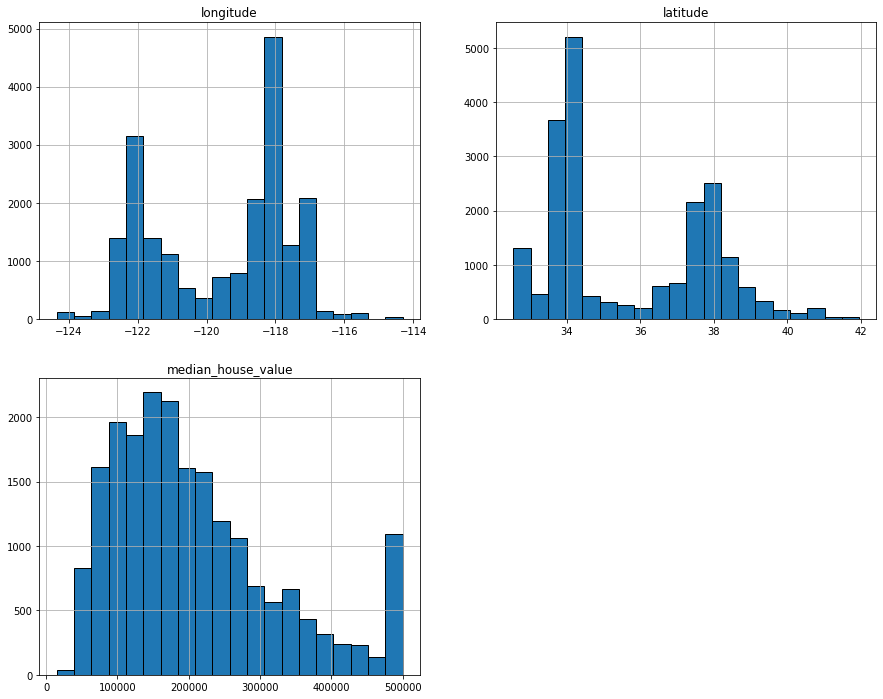

In [12]:
import matplotlib.pyplot as plt

housing.hist(column=['longitude', 'latitude', 'median_house_value'], figsize=(15, 12), bins=20, edgecolor="black")
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.savefig("test.svg")

##RFR Model

In [13]:
from sklearn.ensemble import RandomForestRegressor

RF_Result = pd.DataFrame(columns=['Max Depth', 'Nmber of estimators', 'R2 Score'])

for depth in [5, 15, 30]:
  for n in [5, 20 , 50]:
    clf = RandomForestRegressor(n_estimators = n, max_depth = depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    r2score = metrics.r2_score(y_test, y_pred)
    RF_Result.loc[len(RF_Result.index)] = [depth, n, r2score]
RF_Result

,Max Depth,Nmber of estimators,R2 Score
0,5.0,5.0,0.470388
1,5.0,20.0,0.471203
2,5.0,50.0,0.474172
3,15.0,5.0,0.768358
4,15.0,20.0,0.804663
5,15.0,50.0,0.809233
6,30.0,5.0,0.782964
7,30.0,20.0,0.814285
8,30.0,50.0,0.822594


#Clustering

##Part 1-1 : Clustring Images

###1-1-1 : Flower Image

####Load Libraries

In [14]:
from skimage import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

####Load Image

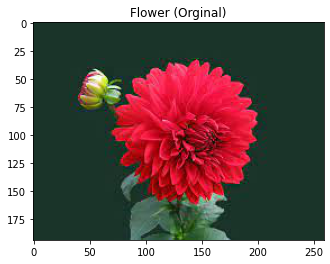

In [15]:
img = io.imread('https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/3/flower.jpg')
img_shape = img.shape
plt.title('Flower (Orginal)')
plt.imshow(img)
img = img.reshape((img.shape[1]*img.shape[0],3))

####Cluster Image Data

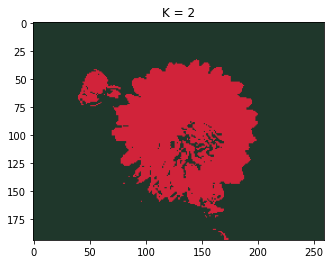

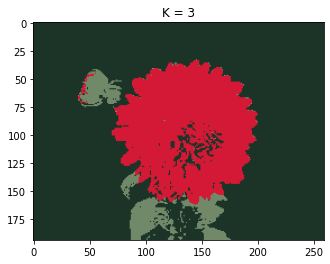

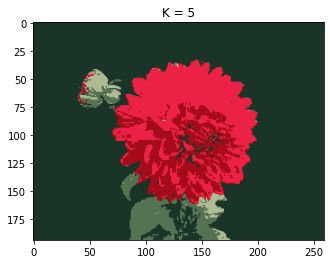

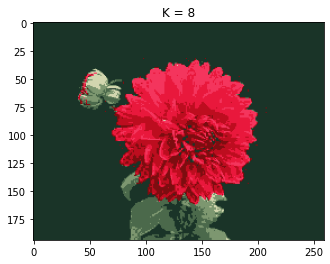

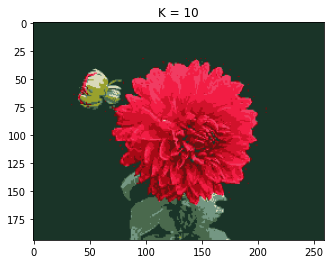

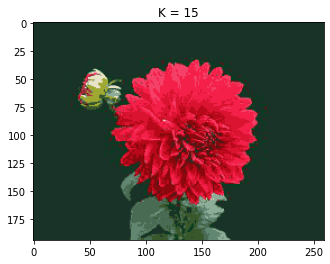

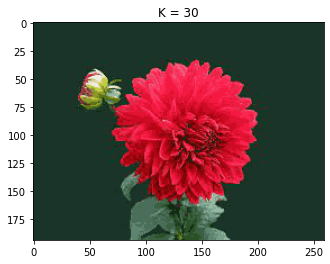

In [16]:
for k in [2, 3, 5, 8, 10, 15, 30]:
  kmeans = KMeans(n_clusters=k)
  clus = kmeans.fit(img)
  centers = np.int_(clus.cluster_centers_)
  segmented_image = centers[clus.labels_.flatten()]
  segmented_image = segmented_image.reshape(img_shape)
  plt.imshow(segmented_image)
  plt.title('K = '+str(k))
  plt.show()

###1-1-2 : Flutterby Image

####Load Image

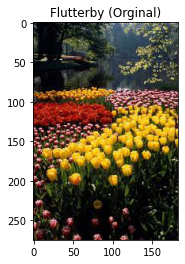

In [17]:
img = io.imread('https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/3/flutterby.jpg')
img_shape = img.shape
plt.title('Flutterby (Orginal)')
plt.imshow(img)
img = img.reshape((img.shape[1]*img.shape[0],3))

####Cluster Image Data

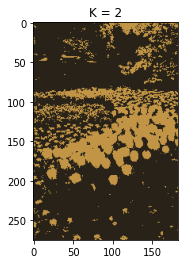

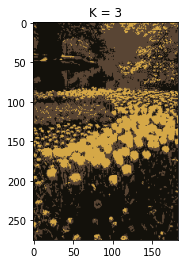

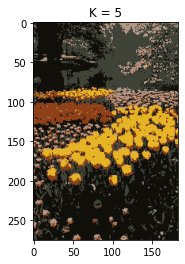

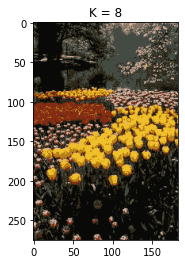

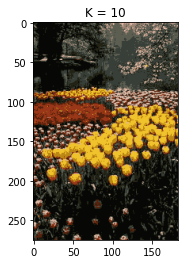

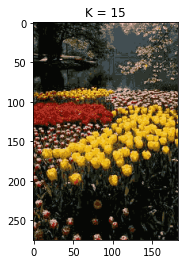

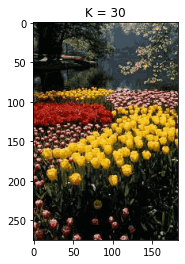

In [18]:
for k in [2, 3, 5, 8, 10, 15, 30]:
  kmeans = KMeans(n_clusters=k)
  clus = kmeans.fit(img)
  centers = np.int_(clus.cluster_centers_)
  segmented_image = centers[clus.labels_.flatten()]
  segmented_image = segmented_image.reshape(img_shape)
  plt.imshow(segmented_image)
  plt.title('K = '+str(k))
  plt.show()

##Part 1-2 : Find Best K by elbow

In [19]:
path = "https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/3/Shill_Bidding.csv"
shill_bidding = pd.read_csv(path)
shill_bidding = shill_bidding.drop(labels=['Record_ID','Auction_ID','Bidder_ID'],axis=1)
shill_bidding.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


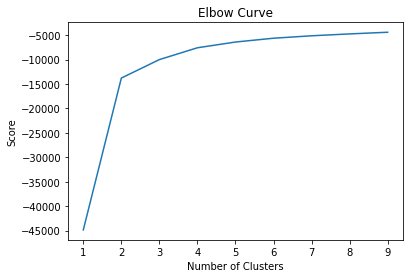

In [20]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(shill_bidding).score(shill_bidding) for i in range(len(kmeans))]
#Plot elbow curve
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.savefig("elbow.svg")
plt.show()

##Part 2-1 : Plot 2D Data

###Dataset 1

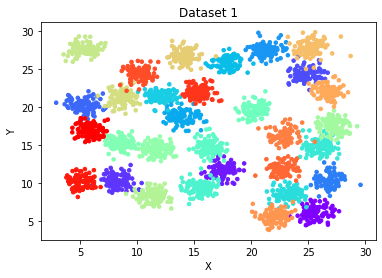

In [21]:
path = "https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/4/dataset1.csv"
dataset1 = pd.read_csv(path)
#Plot
plt.scatter(dataset1.x, dataset1.y, c=dataset1.label, s=50, cmap='rainbow', marker='.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 1')
plt.savefig("1.svg")
plt.show()

###Dataset 2

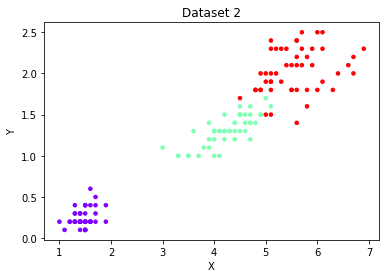

In [22]:
path = "https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/4/dataset2.csv"
dataset2 = pd.read_csv(path)
le = LabelEncoder()
dataset2['label'] = le.fit_transform(dataset2.label.values)
#Plot
plt.scatter(dataset2.x, dataset2.y, c=dataset2.label, s=50, cmap='rainbow', marker='.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 2')
plt.savefig("2.svg")
plt.show()

###Dataset 3

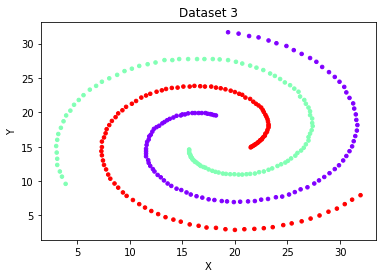

In [23]:
path = "https://raw.githubusercontent.com/saeedgolzar/AML_Course/main/Assignments/ML_HW3/DataSet/4/dataset3.csv"
dataset3 = pd.read_csv(path)
#Plot
plt.scatter(dataset3.x, dataset3.y, c=dataset3.label, s=50, cmap='rainbow', marker='.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 3')
plt.savefig("3.svg")
plt.show()

##Part 2-2 : Compare Clusters

In [66]:
Cluster_Result = pd.DataFrame(columns=['Dataset', 'Model', 'Purity'])

def result_handler(dataset, model, purity_score):
  #Cluster_Result.drop(SVM_Result.index[Cluster_Result['Model'] == model & Cluster_Result['Dataset'] == dataset], inplace=True)
  Cluster_Result.loc[len(Cluster_Result.index)] = [dataset, model, purity_score]
  display(Cluster_Result.loc[Cluster_Result['Dataset'] == dataset].loc[Cluster_Result['Model'] == model])

In [67]:
#Define Purity score function
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

###Dataset 1

####K-means

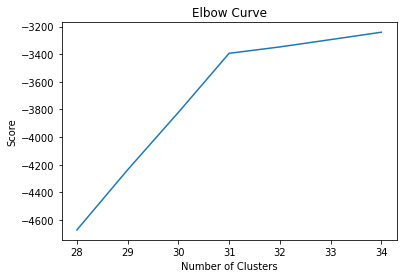

In [93]:
X = dataset1[['x', 'y']].to_numpy()
y_true = dataset1[['label']].to_numpy().flatten()

K_clusters = range(28,35)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#Plot elbow curve
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.savefig("elbow-31.svg")
plt.show()

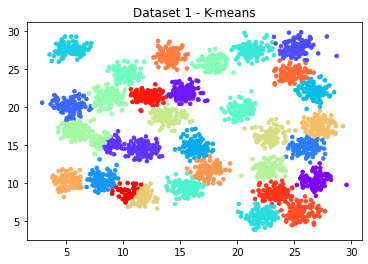

In [69]:
kmeans = KMeans(n_clusters=31).fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow', marker='.')
plt.title('Dataset 1 - K-means')
plt.savefig("kmean-1.svg")


In [70]:
result_handler('Dataset 1', 'K-means', purity_score(y_true, y_kmeans))

,Dataset,Model,Purity
0,Dataset 1,K-means,0.944194


####BDSCAN

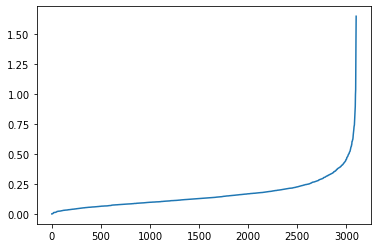

In [71]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

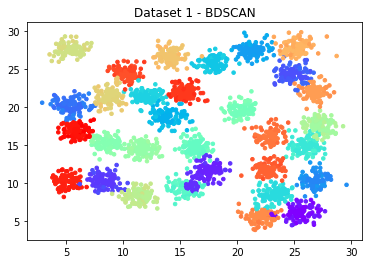

In [72]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.25, min_samples=1).fit(X)
labels = dbs.labels_

y_bds = dbs.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_bds, s=50, cmap='rainbow', marker='.')
plt.title('Dataset 1 - BDSCAN')
plt.savefig("DBS-1.svg")

In [73]:
result_handler('Dataset 1', 'BDSCAN', purity_score(y_true, y_bds))

,Dataset,Model,Purity
1,Dataset 1,BDSCAN,0.987419


####Gaussian Mixture

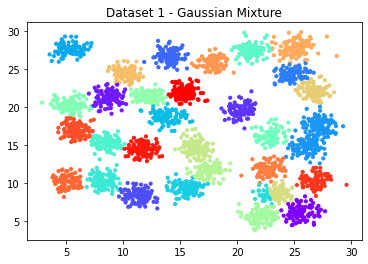

In [74]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=31).fit(X)
y_gmm = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=40, cmap='rainbow', marker='.')
plt.title('Dataset 1 - Gaussian Mixture')
plt.savefig("GMM-1.svg")

In [75]:
result_handler('Dataset 1', 'GMM', purity_score(y_true, y_gmm))

,Dataset,Model,Purity
2,Dataset 1,GMM,0.942903


###Dataset 2

####K-means

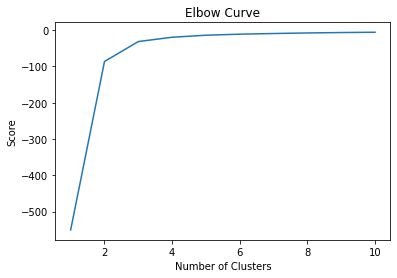

In [76]:
X = dataset2[['x', 'y']].to_numpy()
y_true = dataset2[['label']].to_numpy().flatten()

K_clusters = range(1,11)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#Plot elbow curve
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.savefig("elbow-32.svg")
plt.show()

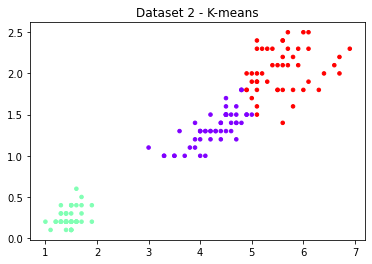

In [77]:
kmeans = KMeans(n_clusters=3).fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow', marker='.')
plt.title('Dataset 2 - K-means')
plt.savefig("kmean-2.svg")

In [78]:
result_handler('Dataset 2', 'K-means', purity_score(y_true, y_kmeans))

,Dataset,Model,Purity
3,Dataset 2,K-means,0.96


####BDSCAN

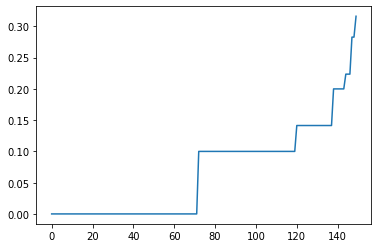

In [79]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

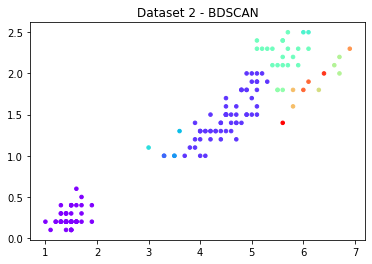

In [80]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.2, min_samples=1).fit(X)
labels = dbs.labels_

y_bds = dbs.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_bds, s=50, cmap='rainbow', marker='.')
plt.title('Dataset 2 - BDSCAN')
plt.savefig("DBS-2.svg")

In [81]:
result_handler('Dataset 2', 'BDSCAN', purity_score(y_true, y_bds))

,Dataset,Model,Purity
4,Dataset 2,BDSCAN,0.893333


####Gaussian Mixture

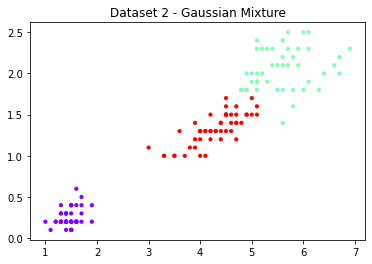

In [82]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(X)
y_gmm = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=40, cmap='rainbow', marker='.')
plt.title('Dataset 2 - Gaussian Mixture')
plt.savefig("GMM-2.svg")

In [83]:
result_handler('Dataset 2', 'GMM', purity_score(y_true, y_gmm))

,Dataset,Model,Purity
5,Dataset 2,GMM,0.973333


###Dataset 3

####K-means

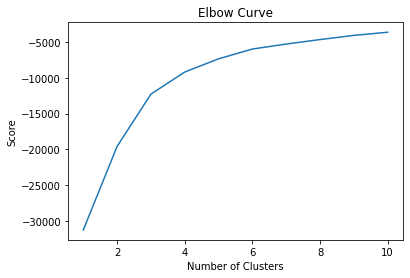

In [84]:
X = dataset3[['x', 'y']].to_numpy()
y_true = dataset3[['label']].to_numpy().flatten()

K_clusters = range(1,11)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#Plot elbow curve
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.savefig("elbow-33.svg")
plt.show()

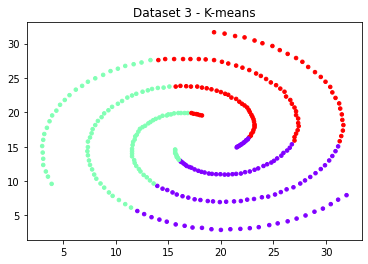

In [85]:
kmeans = KMeans(n_clusters=3).fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow', marker='.')
plt.title('Dataset 3 - K-means')
plt.savefig("kmean-3.svg")

In [86]:
result_handler('Dataset 3', 'K-means', purity_score(y_true, y_kmeans))

,Dataset,Model,Purity
6,Dataset 3,K-means,0.346154


####BDSCAN

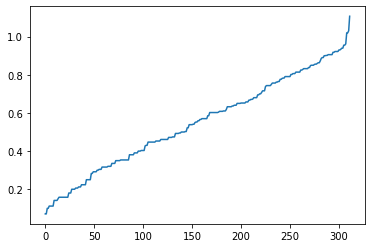

In [87]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

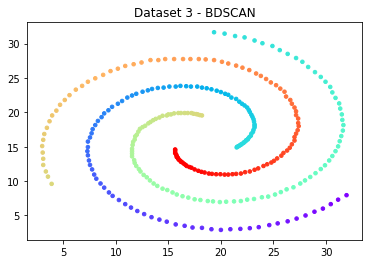

In [88]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.25, min_samples=1).fit(X)
labels = dbs.labels_

y_bds = dbs.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_bds, s=50, cmap='rainbow', marker='.')
plt.title('Dataset 3 - BDSCAN')
plt.savefig("DBS-3.svg")

In [89]:
result_handler('Dataset 3', 'BDSCAN', purity_score(y_true, y_bds))

,Dataset,Model,Purity
7,Dataset 3,BDSCAN,1.0


####Gaussian Mixture

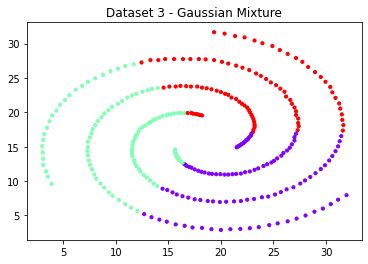

In [90]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(X)
y_gmm = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=40, cmap='rainbow', marker='.')
plt.title('Dataset 3 - Gaussian Mixture')
plt.savefig("GMM-3.svg")

In [91]:
result_handler('Dataset 3', 'GMM', purity_score(y_true, y_gmm))

,Dataset,Model,Purity
8,Dataset 3,GMM,0.352564


In [95]:
print('Clustring Result:')
Cluster_Result

Clustring Result:


,Dataset,Model,Purity
0,Dataset 1,K-means,0.944194
1,Dataset 1,BDSCAN,0.987419
2,Dataset 1,GMM,0.942903
3,Dataset 2,K-means,0.960000
4,Dataset 2,BDSCAN,0.893333
5,Dataset 2,GMM,0.973333
6,Dataset 3,K-means,0.346154
7,Dataset 3,BDSCAN,1.000000
8,Dataset 3,GMM,0.352564
